## REGRESSION EUROPE COUNTRIES


In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [9]:
data = pd.read_csv("../data/Europe.csv")
data

,Unnamed: 0,Country,Exports_2014,Exports_2015,Exports_2016,Exports_2017,Exports_2018,Exports_2019,Exports_2020,Exports_2021,...,Inflation_2022,Openness_2014,Openness_2015,Openness_2016,Openness_2017,Openness_2018,Openness_2019,Openness_2020,Openness_2021,Openness_2022
0,21,Albania,1550.684438,1471.774970,1624.400938,1839.221896,2128.749262,2181.891551,2225.374741,2907.461033,...,6.725203,8.913645,9.082456,9.090574,10.024698,9.595751,9.752720,9.666736,11.130297,11.592507
1,22,"Belarus, Rep. of",26173.634447,18975.785011,18539.704177,23037.141102,27048.055012,26664.380583,22939.980049,31365.171565,...,15.209675,30.587339,31.102151,36.199185,38.781910,40.662923,37.992182,36.132982,42.315178,30.125781
2,23,Bosnia and Herzegovina,3501.699821,2652.095746,2637.789037,2926.963485,3374.153023,3250.373053,3005.301203,4073.556419,...,14.020844,13.832474,12.943029,12.555275,13.200678,13.144530,12.495821,10.961274,13.487955,15.325469
3,24,Bulgaria,13181.224349,12021.407333,13291.706584,16213.043261,17393.495430,16956.082619,15761.776097,21351.971395,...,15.325259,22.412601,22.136000,21.992795,24.338645,22.621430,21.765572,19.947740,22.932643,28.797531
4,25,Hungary,26087.589053,21889.614161,22367.927615,25710.301416,30554.315947,29793.129744,28582.278373,36525.521644,...,14.608144,18.868083,18.492262,18.254979,19.035609,19.096970,18.154843,18.394827,20.088499,21.396685
5,26,"Kosovo, Rep. of",1262.531801,1034.688638,1145.721680,1324.893829,1436.694604,1378.819821,1286.144404,1808.211133,...,11.580510,9.563107,8.834994,9.485893,10.347646,10.279589,9.851009,9.637267,11.413472,12.268675
6,27,"Moldova, Rep. of",4733.112044,3206.119880,3084.314814,3640.844996,4442.804342,4831.716253,4071.798480,5708.927462,...,28.737298,34.756110,30.231783,28.519809,28.929523,28.977531,29.675659,25.894163,33.897062,35.076256
7,28,Montenegro,1508.407815,1327.957268,1356.434565,1206.545500,914.895068,1102.124980,1572.381628,1807.931922,...,13.040304,20.036824,19.437166,19.161551,15.562707,10.655182,12.650362,19.712087,18.892124,24.999935
8,29,"North Macedonia, Republic of",2235.602765,2069.327205,2160.316426,2619.570512,3022.065630,2740.619760,2944.689478,3940.048269,...,14.204717,16.879748,18.457657,17.164125,20.253406,20.388378,19.618013,19.984020,24.384120,27.390490
9,30,"Poland, Rep. of",52525.927666,44729.131799,46298.332824,55872.716910,68744.936006,67882.611365,66735.962456,95213.702130,...,14.429451,8.598554,8.256323,8.650321,9.272189,9.613349,9.544813,9.319897,11.188187,12.219806


In [10]:
for year in range(2014, 2023):
    # Logarithmic transformation of the columns
    data[f'log_GDP_{year}'] = np.log(data[f'GDP_{year}'] + 1)
    data[f'log_Exports_{year}'] = np.log(data[f'Exports_{year}'] + 1)
    data[f'log_Imports_{year}'] = np.log(data[f'Imports_{year}'] + 1)
    data[f'log_Inflation_{year}'] = np.log(data[f'Inflation_{year}'] + 1)
    data[f'log_Openness_{year}'] = np.log(data[f'Openness_{year}'] + 1)

# Analyse for each year
for year in range(2014, 2023):
    cols = [f'log_Exports_{year}', f'log_Imports_{year}', f'log_Inflation_{year}', f'log_GDP_{year}']

    # Drop NA
    data_year = data.dropna(subset=cols)

    # Independent and dependent variables
    X = data_year[[f'log_Exports_{year}', f'log_Imports_{year}', f'log_Inflation_{year}', f'log_Openness_{year}']]
    Y = data_year[f'log_GDP_{year}']

    # Train and test split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediction and evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Year: {year}")
    print("Coefficients:", model.coef_)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R²):", r2)
    print()


Year: 2014
Coefficients: [ 0.76956941  0.24120837  0.02693415 -1.13772801]
Mean Squared Error (MSE): 0.008905934557961266
R-squared (R²): 0.9971303682742818

Year: 2015
Coefficients: [ 0.74589092  0.26516474  0.0327897  -1.20829742]
Mean Squared Error (MSE): 0.02437304122941313
R-squared (R²): 0.9923827082895126

Year: 2016
Coefficients: [ 0.76171544  0.25891716  0.01985713 -1.11696734]
Mean Squared Error (MSE): 0.007026345377915862
R-squared (R²): 0.9978447424341572

Year: 2017
Coefficients: [ 0.78566853  0.24090251 -0.01527516 -1.03077647]
Mean Squared Error (MSE): 0.0014289513225535257
R-squared (R²): 0.9993955706739799

Year: 2018
Coefficients: [ 0.80136515  0.22942205 -0.02415732 -1.04212023]
Mean Squared Error (MSE): 0.002564244514163517
R-squared (R²): 0.9988939862882853

Year: 2019
Coefficients: [ 0.72687115  0.27587493  0.02344978 -1.06826299]
Mean Squared Error (MSE): 0.0008557906958839536
R-squared (R²): 0.9996300155253828

Year: 2020
Coefficients: [ 0.73242097  0.28742822 -

C:\Users\Manjaka\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Manjaka\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Manjaka\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Manjaka\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


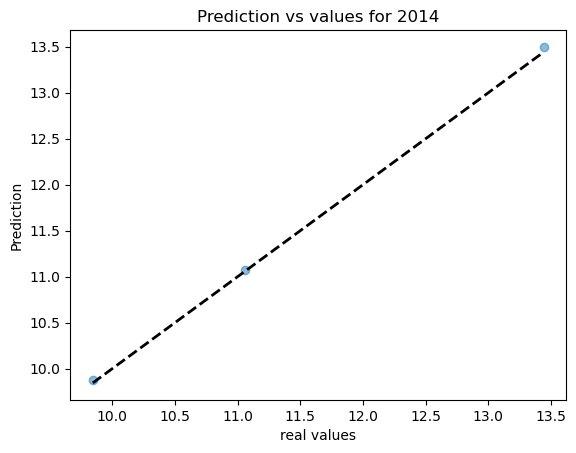

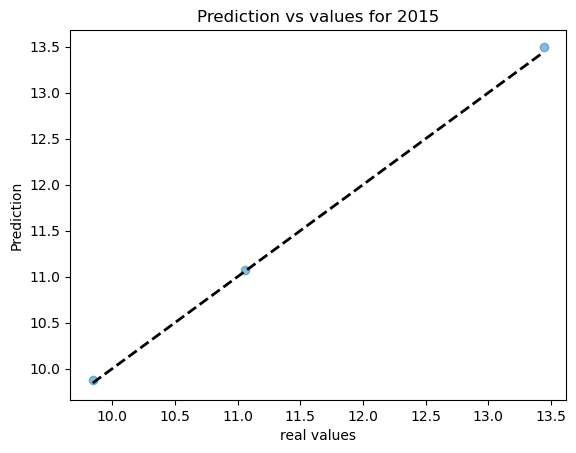

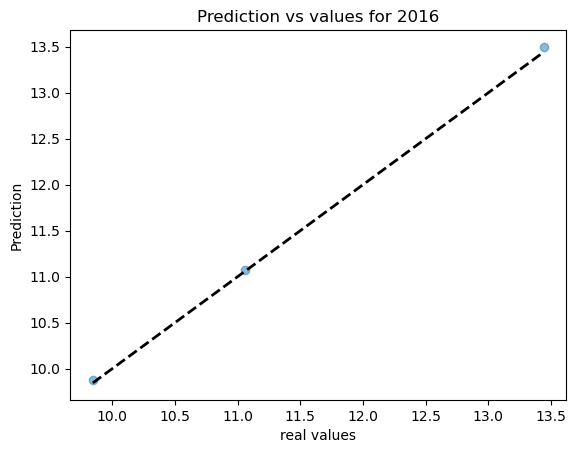

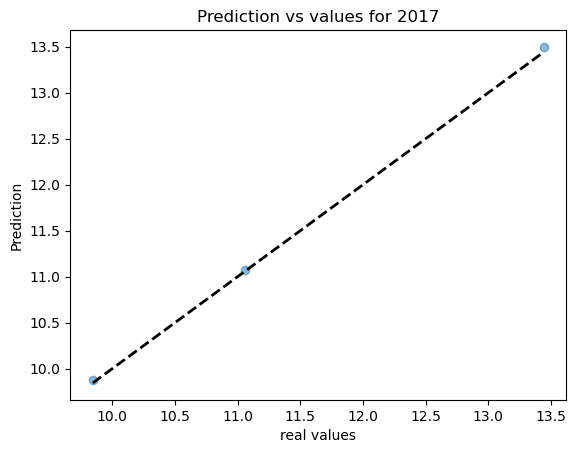

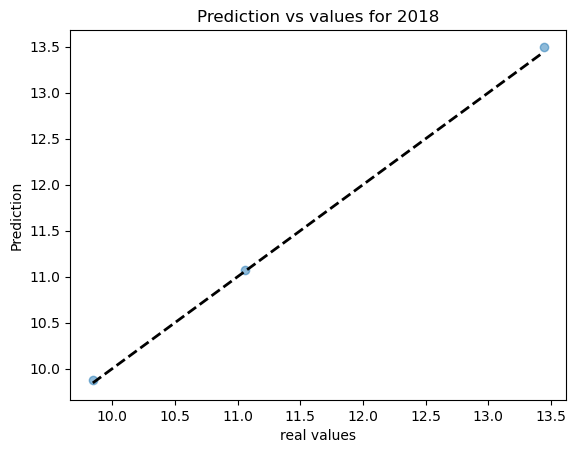

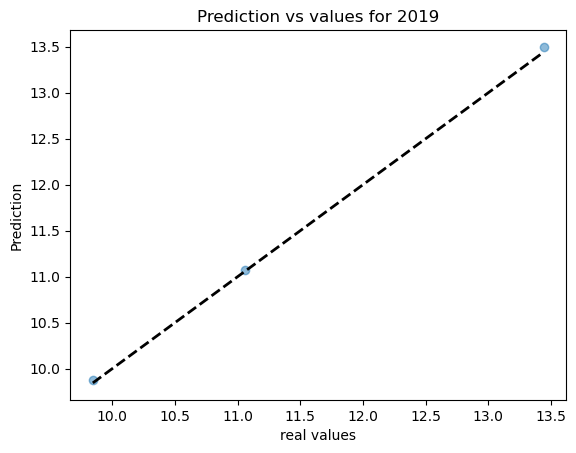

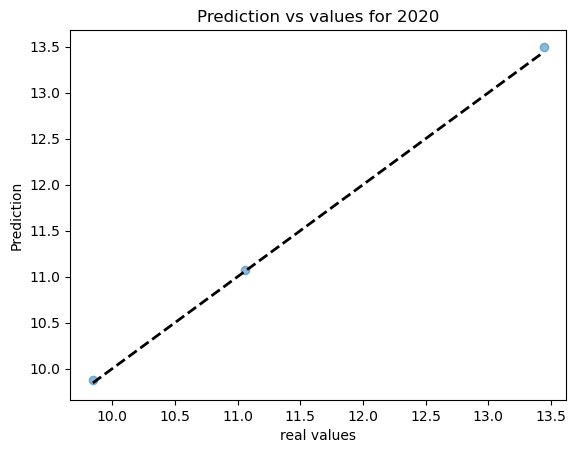

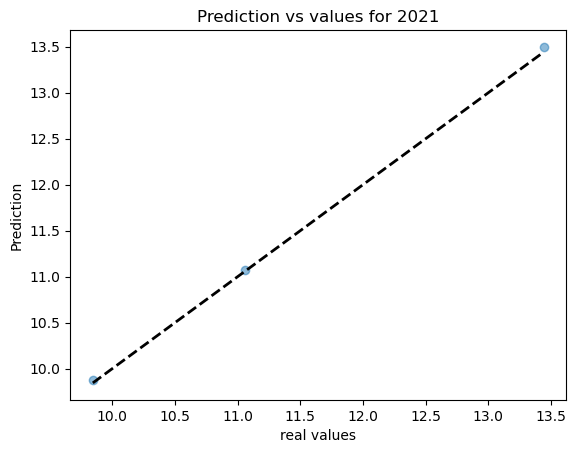

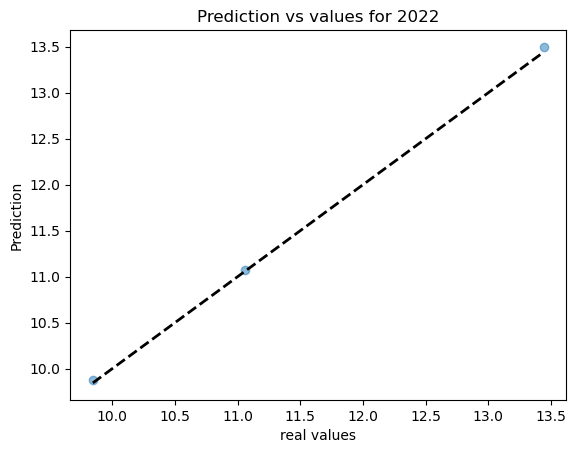

In [7]:
for year in range(2014, 2023):
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('real values')
    plt.ylabel('Prediction')
    plt.title(f'Prediction vs values for {year}')
    plt.show()